This notebook is used to assess the p-value distributions from the SPIA tests

In [1]:
import sys
import time
import os
import getpass
import json
import itertools as itt
from collections import defaultdict

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kstest, ks_2samp, wilcoxon
from pathway_forte.mappings import (
    get_equivalent_mappings_dict, 
    remap_comparison_df, 
    get_equivalent_mapping_wilcoxon,
)

In [2]:
%matplotlib inline

In [3]:
print(sys.version)

3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]


In [4]:
print(time.asctime())

Mon May 27 08:49:27 2019


In [5]:
print(getpass.getuser())

sarah


In [6]:
equivalent_mappings_dict = get_equivalent_mappings_dict()

In [7]:
output = os.environ['ENRICHMENT_OUTPUT']

In [8]:
databases = ['kegg', 'wikipathways', 'reactome']
datasets = ['brca', 'kirc', 'lihc', 'prad']
prefixes = {
    'kegg': 'hsa', 
    'wikipathways': 'WP',
    'reactome':'R-HSA',
}

output_directory =  os.path.join(output, 'ks')
os.makedirs(output_directory, exist_ok=True)

In [9]:
def name_to_database(name):
    for database, prefix in prefixes.items():
        if name.startswith(prefix):
            return database

# ORA

In [10]:
ora_directory = os.path.join(output, 'ora')

In [11]:
ora_dfs = []

for dataset in datasets:
    for db1, db2 in itt.product(databases, repeat=2):
        path = os.path.join(ora_directory, f'{dataset}_{db1}_{db2}_ora_threshold.json')
        if not os.path.exists(path):
            continue
        with open(path, 'r') as f:
            data = json.load(f)
        df = pd.DataFrame({'pval': data})
        df['pathway_id'] = df.index
        df['comparison'] = f'{db1}_{db2}'
        df['db'] = df.index.map(name_to_database)
        df['dataset'] = dataset
        ora_dfs.append(df)

ora_df = pd.concat(ora_dfs)
ora_df.reset_index()

,index,pval,pathway_id,comparison,db,dataset
0,WP1403,0.0412,WP1403,kegg_wikipathways,wikipathways,brca
1,WP1471,0.0262,WP1471,kegg_wikipathways,wikipathways,brca
2,WP179,0.0000,WP179,kegg_wikipathways,wikipathways,brca
3,WP183,0.0000,WP183,kegg_wikipathways,wikipathways,brca
4,WP2037,0.0000,WP2037,kegg_wikipathways,wikipathways,brca
5,WP2118,0.0111,WP2118,kegg_wikipathways,wikipathways,brca
6,WP2267,0.0008,WP2267,kegg_wikipathways,wikipathways,brca
7,WP2272,0.0000,WP2272,kegg_wikipathways,wikipathways,brca
8,WP23,0.0001,WP23,kegg_wikipathways,wikipathways,brca
9,WP2328,0.0140,WP2328,kegg_wikipathways,wikipathways,brca


In [12]:
sns.catplot(
    data=ora_df,
    y='pval',
    x='dataset',
    kind='violin',
    hue='comparison',
)
plt.title('Distributions of ORA $p-values$')
plt.ylabel('Raw $p-value$')
plt.xlabel('')
plt.ylim([0, 1])
plt.tight_layout()
plt.savefig(os.path.join(output_directory, 'ks_ora_p_values.png'))
plt.show()

AttributeError: module 'seaborn' has no attribute 'catplot'

In [13]:
ora_ks_rows = []

for dataset in datasets:
    dataset_df = ora_df[ora_df.dataset == dataset]    
    for comparison in dataset_df.comparison.unique():
        dataset_comparison_df = dataset_df[dataset_df.comparison == comparison]
        
        source_db, target_db = comparison.split('_')
        wilcoxon_p = get_equivalent_mapping_wilcoxon(
            dataset_comparison_df,
            source_db, 
            target_db,
            identifier_column_name='pathway_id',
            equivalent_mappings_dict=equivalent_mappings_dict,
        )
        
        # 2 sample KS test
        _, ks_p = ks_2samp(*[
            group['pval'].values
            for name, group in dataset_comparison_df.groupby('db')
        ])
        ora_ks_rows.append((dataset, comparison, ks_p, wilcoxon_p))

ora_ks_df = pd.DataFrame(
    ora_ks_rows, 
    columns=['dataset', 'comparison', 'ks_p', 'wilcoxon_p'],
)
ora_ks_df['method'] = 'ora'
ora_ks_df['wilcoxon_significant'] = ora_ks_df['wilcoxon_p'] < 0.05
ora_ks_df.to_csv(os.path.join(output_directory, 'ks_ora.tsv'), sep='\t', index=False)
ora_ks_df

/home/sarah/project_benchmark/pathway-forte/src/pathway_forte/mappings.py:191: RuntimeWarning: divide by zero encountered in log10
  np.log10(source_pval) - np.log10(target_pval),
/home/sarah/project_benchmark/pathway-forte/src/pathway_forte/mappings.py:191: RuntimeWarning: invalid value encountered in double_scalars
  np.log10(source_pval) - np.log10(target_pval),
/home/sarah/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/home/sarah/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)
/home/sarah/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/sarah/anaconda3/lib/python3.6/site-packages/scipy/stats

,dataset,comparison,ks_p,wilcoxon_p,method,wilcoxon_significant
0,brca,kegg_wikipathways,0.995773,8.457880e-05,ora,True
1,brca,kegg_reactome,0.659974,5.364437e-03,ora,True
2,brca,reactome_wikipathways,0.305373,3.548299e-04,ora,True
3,kirc,kegg_wikipathways,0.460685,5.878172e-02,ora,False
4,kirc,kegg_reactome,0.014489,1.088094e-01,ora,False
5,kirc,reactome_wikipathways,0.886795,2.601448e-02,ora,True
6,lihc,kegg_wikipathways,0.218447,7.819240e-07,ora,True
7,lihc,kegg_reactome,0.883526,1.329623e-04,ora,True
8,lihc,reactome_wikipathways,0.080109,6.654347e-04,ora,True
9,prad,kegg_wikipathways,0.550596,4.329329e-05,ora,True


In [45]:
ora_brca_df = ora_ks_df.loc[ora_ks_df['dataset'] == 'brca']
ora_kirc_df = ora_ks_df.loc[ora_ks_df['dataset'] == 'kirc']
ora_prad_df = ora_ks_df.loc[ora_ks_df['dataset'] == 'prad']
ora_lihc_df = ora_ks_df.loc[ora_ks_df['dataset'] == 'lihc']

In [46]:
pairwise_db = ora_brca_df['comparison'].tolist()

In [47]:
x_pos = [i for i, _ in enumerate(pairwise_db)]

In [48]:
ora_brca_wilcoxon = ora_brca_df['wilcoxon_p'].tolist()
ora_kirc_wilcoxon = ora_kirc_df['wilcoxon_p'].tolist()
ora_lihc_wilcoxon = ora_prad_df['wilcoxon_p'].tolist()
ora_prad_wilcoxon = ora_lihc_df['wilcoxon_p'].tolist()

In [53]:
# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
# fig.suptitle('Pairwise Database vs. Wilcoxon p-value for GSEA', fontsize=20)

# N = 3
# index = np.arange(N)
# bar_width = 0.25
# opacity = 0.8

# pairings = (
#     'KEGG-WikiPathways', 
#     'KEGG-Reactome', 
#     'Reactome-WikiPathways'
# )

# label_font = {'size': 16}

# plt.subplot(2, 2, 1)
# plt.bar(pairwise_db, ora_brca_wilcoxon,  color='#2679b2')
# plt.title('BRCA', fontsize=16)
# plt.xticks(index, pairings)
# plt.yticks(np.arange(0, 0.65, step=0.1))
# plt.ylabel('p-value')

# plt.subplot(2, 2, 2)
# plt.bar(pairwise_db, ora_kirc_wilcoxon,  color='#2679b2')

# plt.title('KIRC', fontsize=16)
# plt.xticks(index, pairings)
# plt.yticks(np.arange(0, 0.65, step=0.1))

# plt.subplot(2, 2, 3)
# plt.bar(pairwise_db, ora_lihc_wilcoxon, color='#2679b2')

# plt.title('LIHC', fontsize=16)
# plt.xticks(index, pairings)
# plt.yticks(np.arange(0, 0.65, step=0.1))
# plt.ylabel('p-value')

# plt.subplot(2, 2, 4)
# plt.bar(pairwise_db, ora_prad_wilcoxon,color='#2679b2', )
# plt.title('PRAD', fontsize=16)
# plt.xticks(index, pairings)
# plt.yticks(np.arange(0, 0.65, step=0.1))
# plt.yticks()

# fig.autofmt_xdate()
# # fig.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('gsea_pairwise_p_values.png',dpi=250)
# plt.show()

# GSEA

In [14]:
gsea_directory = os.path.join(output, 'gsea')

In [15]:
gsea_dfs = []

for dataset in datasets:
    for db1, db2 in itt.product(databases, repeat=2):
        path = os.path.join(gsea_directory, f'{db1}_{db2}_{dataset}.tsv')
        if not os.path.exists(path):
            continue
        df = pd.read_csv(path, sep='\t')
        df['comparison'] = f'{db1}_{db2}'
        df['db'] = df['Term'].map(name_to_database)
        df['dataset'] = dataset
        gsea_dfs.append(df)

gsea_df = pd.concat(gsea_dfs)

In [16]:
gsea_df.head()

,Term,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes,comparison,db,dataset
0,hsa03030,-0.511916,-1.428605,0.040000,0.286401,36,36,RFC1;RPA1;RPA2;RNASEH2B;RNASEH1;POLE4;POLA1;PO...,RFC5;RPA4;SSBP1;PRIM1;POLE;MCM5;POLD2;MCM7;RFC...,kegg_wikipathways,kegg,brca
1,WP2828,-0.360112,-1.450696,0.145833,0.288069,41,40,EGF;PIK3R1;EGFR;HBEGF;MYC;DAPK2;RPS6KA5;CDKN1A...,TYMP;ERBB2;FGFR3;E2F1;CDKN2A;MMP9;MMP1,kegg_wikipathways,wikipathways,brca
2,hsa03050,-0.431336,-1.361182,0.058824,0.308791,45,45,PSMB11;PSMC1;PSMD6;PSMD7;PSMA8;PSMF1;PSMC6;PSM...,PSMC6;PSMB1;PSMA1;PSMB6;PSMB7;PSME3;PSMD1;PSMD...,kegg_wikipathways,kegg,brca
3,WP4022,-0.325892,-1.343728,0.166667,0.311189,86,84,DPYS;DPYD;TK2;POLR3GL;POLR1E;CMPK1;DHODH;ENPP3...,POLR1B;POLA1;UPP1;UMPS;NME6;POLD3;POLR3C;RRM2B...,kegg_wikipathways,wikipathways,brca
4,WP183,-0.405517,-1.376865,0.185185,0.320513,64,62,HLA-E;NEDD4;UBE2B;UBC;UBE2D3;PSMC1;UBA7;UBE2D1...,UBB;PSMC6;PSMB1;PSMD5;PSMA1;PSMD9;PSMB6;PSMB7;...,kegg_wikipathways,wikipathways,brca


In [17]:
sns.catplot(
    data=gsea_df,
    y='pval',
    x='dataset',
    kind='violin',
    hue='comparison',
)
plt.title('Distributions of GSEA $p-values$')
plt.ylabel('Raw $p-value$')
plt.xlabel('')
plt.ylim([0, 1])
plt.tight_layout()
plt.savefig(os.path.join(output_directory, 'ks_gsea_p_values.png'))
plt.show()

AttributeError: module 'seaborn' has no attribute 'catplot'

In [18]:
gsea_ks_rows = []

for dataset in datasets:
    dataset_df = gsea_df[gsea_df.dataset == dataset]    
    for comparison in dataset_df.comparison.unique():
        dataset_comparison_df = dataset_df[dataset_df.comparison == comparison]
        
        groups = [
            group.pval.values
            for name, group in dataset_comparison_df.groupby('db')
        ]
        
        source_db, target_db = comparison.split('_')
        wilcoxon_p = get_equivalent_mapping_wilcoxon(
            dataset_comparison_df,
            source_db, 
            target_db,
            equivalent_mappings_dict=equivalent_mappings_dict,
        )
    
        # 2 sample KS test
        _, ks_p = ks_2samp(*groups)
        gsea_ks_rows.append((dataset, comparison, ks_p, wilcoxon_p))

gsea_ks_df = pd.DataFrame(
    gsea_ks_rows, 
    columns=['dataset', 'comparison', 'ks_p', 'wilcoxon_p'],
)
gsea_ks_df['method'] = 'gsea'
gsea_ks_df['wilcoxon_significant'] = gsea_ks_df['wilcoxon_p'] < 0.05
gsea_ks_df.to_csv(os.path.join(output_directory, 'ks_gsea.tsv'), sep='\t', index=False)
gsea_ks_df

/home/sarah/project_benchmark/pathway-forte/src/pathway_forte/mappings.py:191: RuntimeWarning: divide by zero encountered in log10
  np.log10(source_pval) - np.log10(target_pval),
/home/sarah/project_benchmark/pathway-forte/src/pathway_forte/mappings.py:191: RuntimeWarning: invalid value encountered in double_scalars
  np.log10(source_pval) - np.log10(target_pval),
/home/sarah/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/home/sarah/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


,dataset,comparison,ks_p,wilcoxon_p,method,wilcoxon_significant
0,brca,kegg_wikipathways,0.401543,0.389451,gsea,False
1,brca,kegg_reactome,0.619369,0.029370,gsea,True
2,brca,reactome_wikipathways,0.371364,0.371560,gsea,False
3,kirc,kegg_wikipathways,0.859989,0.001117,gsea,True
4,kirc,kegg_reactome,0.474083,0.095161,gsea,False
5,kirc,reactome_wikipathways,0.879095,0.170294,gsea,False
6,lihc,kegg_wikipathways,0.655476,0.048132,gsea,True
7,lihc,kegg_reactome,0.117687,0.596439,gsea,False
8,lihc,reactome_wikipathways,0.879095,0.491281,gsea,False
9,prad,kegg_wikipathways,0.951316,0.392930,gsea,False


In [19]:
gsea_brca_df = gsea_ks_df.loc[gsea_ks_df['dataset'] == 'brca']
gsea_kirc_df = gsea_ks_df.loc[gsea_ks_df['dataset'] == 'kirc']
gsea_prad_df = gsea_ks_df.loc[gsea_ks_df['dataset'] == 'prad']
gsea_lihc_df = gsea_ks_df.loc[gsea_ks_df['dataset'] == 'lihc']

In [22]:
gsea_brca_wilcoxon = gsea_brca_df['wilcoxon_p'].tolist()
gsea_kirc_wilcoxon = gsea_kirc_df['wilcoxon_p'].tolist()
gsea_lihc_wilcoxon = gsea_lihc_df['wilcoxon_p'].tolist()
gsea_prad_wilcoxon = gsea_prad_df['wilcoxon_p'].tolist()

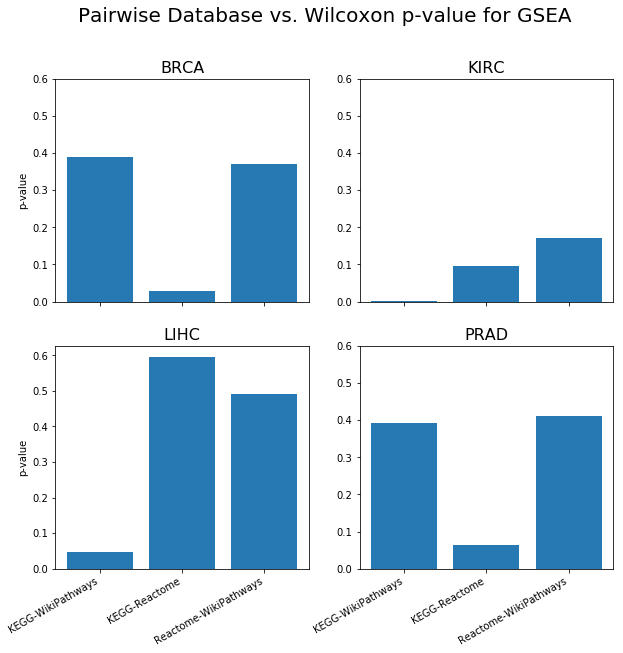

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
fig.suptitle('Pairwise Database vs. Wilcoxon p-value for GSEA', fontsize=20)

N = 3
index = np.arange(N)
bar_width = 0.25
opacity = 0.8

pairings = (
    'KEGG-WikiPathways', 
    'KEGG-Reactome', 
    'Reactome-WikiPathways'
)

label_font = {'size': 16}

plt.subplot(2, 2, 1)
plt.bar(pairwise_db, gsea_brca_wilcoxon,  color='#2679b2')
plt.title('BRCA', fontsize=16)
plt.xticks(index, pairings)
plt.yticks(np.arange(0, 0.65, step=0.1))
plt.ylabel('p-value')

plt.subplot(2, 2, 2)
plt.bar(pairwise_db, gsea_kirc_wilcoxon,  color='#2679b2')

plt.title('KIRC', fontsize=16)
plt.xticks(index, pairings)
plt.yticks(np.arange(0, 0.65, step=0.1))

plt.subplot(2, 2, 3)
plt.bar(pairwise_db, gsea_lihc_wilcoxon, color='#2679b2')

plt.title('LIHC', fontsize=16)
plt.xticks(index, pairings)
plt.yticks(np.arange(0, 0.65, step=0.1))
plt.ylabel('p-value')

plt.subplot(2, 2, 4)
plt.bar(pairwise_db, gsea_prad_wilcoxon,color='#2679b2', )
plt.title('PRAD', fontsize=16)
plt.xticks(index, pairings)
plt.yticks(np.arange(0, 0.65, step=0.1))
plt.yticks()

fig.autofmt_xdate()
# fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('gsea_pairwise_p_values.png',dpi=250)
plt.show()

# SPIA

In [32]:
spia_directory = os.path.join(output, 'spia')

In [36]:
spia_dfs = []

for dataset in datasets:
    for db1, db2 in itt.product(databases, repeat=2):
        path = os.path.join(spia_directory, f'{dataset}_{db1}_{db2}_spia.csv')
        if not os.path.exists(path):
            continue
        df = pd.read_csv(path)
        df['comparison'] = f'{db1}_{db2}'
        df['db'] = df['Name'].map(name_to_database)
        df['dataset'] = dataset
        spia_dfs.append(df)

spia_df = pd.concat(spia_dfs)
spia_df.head()

,Unnamed: 0,Name,ID,pSize,NDE,pNDE,tA,pPERT,pG,pGFdr,pGFWER,Status,KEGGLINK,comparison,db,dataset
0,1,hsa04151,hsa04151,353,351,2.778553e-23,-153.899612,0.001000,1.662833e-24,1.047585e-22,1.047585e-22,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hs...,kegg_wikipathways,kegg,brca
1,2,hsa04010,hsa04010,294,293,1.550445e-20,-49.666312,0.048000,3.694999e-20,1.163925e-18,2.327850e-18,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hs...,kegg_wikipathways,kegg,brca
2,3,hsa04510,hsa04510,199,199,2.689722e-15,-150.824617,0.000005,6.287952e-19,1.320470e-17,3.961410e-17,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hs...,kegg_wikipathways,kegg,brca
3,4,hsa04810,hsa04810,213,213,2.522745e-16,-54.934581,0.074000,7.377661e-16,1.161982e-14,4.647927e-14,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hs...,kegg_wikipathways,kegg,brca
4,5,hsa04062,hsa04062,188,187,6.145755e-13,4.093045,0.883000,1.586891e-11,1.999483e-10,9.997413e-10,Activated,http://www.genome.jp/dbget-bin/show_pathway?hs...,kegg_wikipathways,kegg,brca


In [37]:
sns.catplot(
    data=spia_df,
    y='pG',
    x='dataset',
    kind='violin',
    hue='comparison',
)
plt.title('Distributions of SPIA $p-values$')
plt.ylabel('Raw $p-value$')
plt.xlabel('')
plt.ylim([0, 1])
plt.tight_layout()
plt.savefig(os.path.join(output_directory, 'ks_spia_p_values.png'))
plt.show()

AttributeError: module 'seaborn' has no attribute 'catplot'

In [38]:
spia_ks_rows = []

for dataset in datasets:
    dataset_df = spia_df[spia_df.dataset == dataset]    
    for comparison in dataset_df.comparison.unique():
        dataset_comparison_df = dataset_df[dataset_df.comparison == comparison]

        groups = [
            group['pG'].values
            for name, group in dataset_comparison_df.groupby('db')
        ]
        
        source_db, target_db = comparison.split('_')
        wilcoxon_p = get_equivalent_mapping_wilcoxon(
            dataset_comparison_df,
            source_db, 
            target_db,
            identifier_column_name='Name',
            pval_column_name='pG',
            equivalent_mappings_dict=equivalent_mappings_dict,
        )
        
        # 2 sample KS test
        _, ks_p = ks_2samp(*groups)
        spia_ks_rows.append((dataset, comparison, ks_p, wilcoxon_p))

spia_ks_df = pd.DataFrame(spia_ks_rows, columns=['dataset', 'comparison', 'ks_p', 'wilcoxon_p'])
spia_ks_df['method'] = 'spia'
spia_ks_df['wilcoxon_significant'] = spia_ks_df['wilcoxon_p'] < 0.05
spia_ks_df.to_csv(os.path.join(output_directory, 'ks_spia.tsv'), sep='\t', index=False)
spia_ks_df

/home/sarah/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/sarah/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/sarah/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/sarah/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


,dataset,comparison,ks_p,wilcoxon_p,method,wilcoxon_significant
0,brca,kegg_wikipathways,5.156326e-07,9.087312e-08,spia,True
1,brca,kegg_reactome,6.610303e-03,2.477028e-07,spia,True
2,brca,reactome_wikipathways,7.244088e-01,1.797125e-01,spia,False
3,kirc,kegg_wikipathways,5.156326e-07,9.087312e-08,spia,True
4,kirc,kegg_reactome,6.610303e-03,2.477028e-07,spia,True
5,kirc,reactome_wikipathways,5.212395e-01,1.797125e-01,spia,False
6,lihc,kegg_wikipathways,5.402924e-07,8.387355e-08,spia,True
7,lihc,kegg_reactome,6.610303e-03,2.477028e-07,spia,True
8,lihc,reactome_wikipathways,2.954444e-01,1.797125e-01,spia,False
9,prad,kegg_wikipathways,5.156326e-07,9.843673e-08,spia,True


In [39]:
spia_brca_df = spia_ks_df.loc[spia_ks_df['dataset'] == 'brca']
spia_kirc_df = spia_ks_df.loc[spia_ks_df['dataset'] == 'kirc']
spia_prad_df = spia_ks_df.loc[spia_ks_df['dataset'] == 'prad']
spia_lihc_df = spia_ks_df.loc[spia_ks_df['dataset'] == 'lihc']

In [40]:
spia_brca_wilcoxon = spia_brca_df['wilcoxon_p'].tolist()
spia_kirc_wilcoxon = spia_kirc_df['wilcoxon_p'].tolist()
spia_lihc_wilcoxon = spia_prad_df['wilcoxon_p'].tolist()
spia_prad_wilcoxon = spia_lihc_df['wilcoxon_p'].tolist()

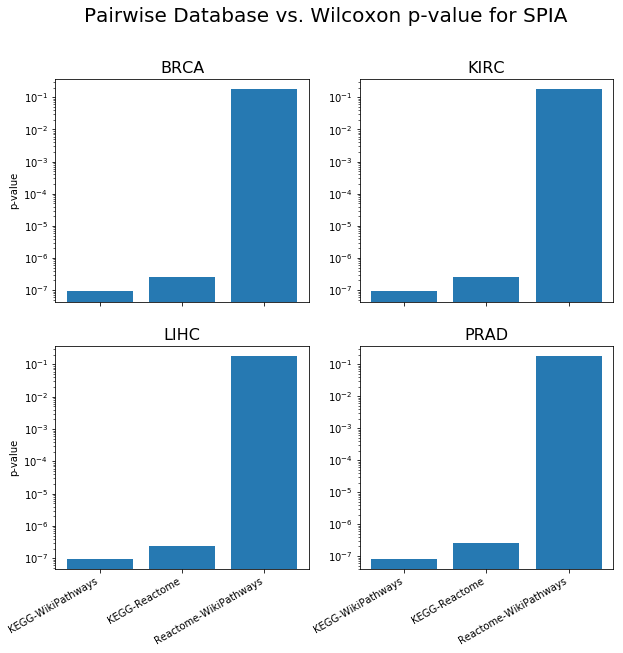

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
fig.suptitle('Pairwise Database vs. Wilcoxon p-value for SPIA', fontsize=20)

N = 3
index = np.arange(N)
bar_width = 0.25
opacity = 0.8

pairings = (
    'KEGG-WikiPathways', 
    'KEGG-Reactome', 
    'Reactome-WikiPathways'
)

label_font = {'size': 16}

plt.subplot(2, 2, 1)
plt.bar(pairwise_db, spia_brca_wilcoxon,  color='#2679b2')

plt.title('BRCA', fontsize=16)
plt.xticks(index, pairings)
plt.yscale('log')
plt.ylabel('p-value')

plt.subplot(2, 2, 2)
plt.bar(pairwise_db, spia_kirc_wilcoxon,  color='#2679b2')

plt.title('KIRC', fontsize=16)
plt.xticks(index, pairings)
plt.yscale('log')

plt.subplot(2, 2, 3)
plt.bar(pairwise_db, spia_lihc_wilcoxon, color='#2679b2')

plt.title('LIHC', fontsize=16)
plt.xticks(index, pairings)
plt.yscale('log')
plt.ylabel('p-value')

plt.subplot(2, 2, 4)
plt.bar(pairwise_db, spia_prad_wilcoxon,color='#2679b2')

plt.title('PRAD', fontsize=16)
plt.xticks(index, pairings)
plt.yscale('log')

fig.autofmt_xdate()
# fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('spia_pairwise_p_values.png',dpi=250)
plt.show()